# Programming Assignment 1
Due Wed 2/5/25

## Problem 1: Finding Prime Numbers

### Method 1

In [4]:
import time

t0 = time.time()

primes = [2]
for i in range(3, 100001):
    isPrime = True
    for f in range(2, i):
        if (i%f == 0):
            isPrime = False
    if isPrime:
        primes.append(i)

tf = time.time()
print("Runtime: {:.1f} s".format(tf-t0))

Runtime: 198.8 s


### Method 2
* Skip evens greater than 2
* Only check divisibility of primes less than ```i```
* Only check factors up to $\sqrt{i}$
* Break once you find the first factor

In [25]:
import math
import time

t0 = time.time()

primes2 = [2]
for i in range(3, 100001):
    isPrime = True
    # Skip this i if even
    if (i%2 == 0):
        continue

    
    # Check i's divisibility by primes less than it (contents of primes2), up to sqrt(i)
    for p in primes2:
        if (p > math.sqrt(i)):
            break
        if (i%p == 0):
            isPrime = False
            break
    
    # Add to list
    if isPrime:
        primes2.append(i)

tf = time.time()
print("Runtime: {:.1f} s".format(tf-t0))

Runtime: 0.1 s


Method 1 takes ~10^4 times longer to run.

## Problem 2: Nuclear Binding Energy

### Part A

In [16]:
A = int(input("Enter A: "))
Z = int(input("Enter Z: "))
print(f"A={A}, Z={Z}")

a1, a2, a3, a4 = 15.8, 18.3, 0.714, 23.2
if A%2!=0:
    a5 = 0
elif A%2==0 and Z%2==0:
    a5 = 12
else:
    a5 = -12

B = a1*A - a2*A**(2/3) - a3*Z**2 / A**(1/3) - a4*(A-2*Z)**2 / A + a5 / A**(1/2)

print(f"B={B}")

A=58, Z=28
B=497.5620206224374


### Part B

In [7]:
print(f"Binding energy per nucleon: " + str(B/A))

Binding energy per nucleon: 8.578655527973059


### Part C

In [22]:
Z = int(input("Enter Z: "))
print(f"Z={Z}")

a1, a2, a3, a4 = 15.8, 18.3, 0.714, 23.2

Bper_max = 0
Aper_max = 0
for A in range(Z, 3*Z+1):
    # Need to recalc a5
    if A%2!=0:
        a5 = 0
    elif A%2==0 and Z%2==0:
        a5 = 12
    else:
        a5 = -12
    # Calculate binding energy B
    B = a1*A - a2*A**(2/3) - a3*Z**2 / A**(1/3) - a4*(A-2*Z)**2 / A + a5 / A**(1/2)
    # ... per nucleon
    Bper = B/A

    # Store Bper and A if these yielded the highest B
    if Bper>Bper_max:
        Bper_max = Bper
        Aper_max = A

print(f"Max binding energy per nucleon (Bper): {Bper_max}    Mass (A): {Aper_max}")

Z=26
Max binding energy per nucleon (Bper): 8.701432576808985    Mass (A): 58


### Part D

In [28]:
a1, a2, a3, a4 = 15.8, 18.3, 0.714, 23.2
most_stable_B, most_stable_Z = 0, 0
for Z in range(1, 101):
    Bper_max = 0
    Aper_max = 0
    for A in range(Z, 3*Z+1):
        # Need to recalc a5
        if A%2!=0:
            a5 = 0
        elif A%2==0 and Z%2==0:
            a5 = 12
        else:
            a5 = -12
        # Calculate binding energy B
        B = a1*A - a2*A**(2/3) - a3*Z**2 / A**(1/3) - a4*(A-2*Z)**2 / A + a5 / A**(1/2)
        # ... per nucleon
        Bper = B/A

        # Store Bper and A if these yielded the highest B
        if Bper>Bper_max:
            Bper_max = Bper
            Aper_max = A
    if Bper_max>most_stable_B:
        most_stable_B = Bper_max
        most_stable_Z = Z
print(f"Most stable Z: {most_stable_Z}    Binding energy per nucleon: {most_stable_B}")

Most stable Z: 28    Binding energy per nucleon: 8.70245768367189


### Part E

In [40]:
# For every element Z,
    # find the most stable nucleus (largest Bper)
    # store the Bper and A
# Graph Bper vs A

import matplotlib.pyplot as plt
# from importlib import reload
# plt=reload(plt)

Bper_max_list = []
Aper_max_list = []

a1, a2, a3, a4 = 15.8, 18.3, 0.714, 23.2
for Z in range (1, 100):
    Bper_max = 0
    Aper_max = 0
    for A in range(Z, 3*Z+1):
        # Need to recalc a5
        if A%2!=0:
            a5 = 0
        elif A%2==0 and Z%2==0:
            a5 = 12
        else:
            a5 = -12
        # Calculate binding energy B
        B = a1*A - a2*A**(2/3) - a3*Z**2 / A**(1/3) - a4*(A-2*Z)**2 / A + a5 / A**(1/2)
        # ... per nucleon
        Bper = B/A

        # Update Bper_max and Aper_max if this A yielded the highest Bper
        if Bper>Bper_max:
            Bper_max = Bper
            Aper_max = A
    # Store this Z's Bper_max and Aper_max in the lists
    Bper_max_list.append(Bper_max)
    Aper_max_list.append(Aper_max)


Text(0, 0.5, 'Bper (binding energy per nucleon)')

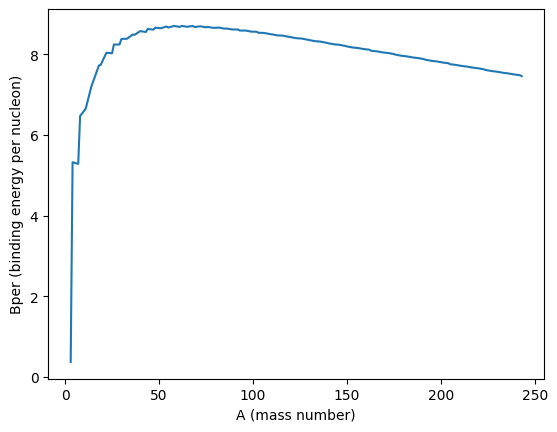

In [41]:
plt.plot(Aper_max_list, Bper_max_list)
plt.xlabel("A (mass number)")
plt.ylabel("Bper (binding energy per nucleon)")

Elements that **release** energy during **fusion**:     \
Elements that **release** energy during **fission**:    \
More energy released in *fusion of light nuclei* or *fission of heavy nuclei*:  